<a href="https://colab.research.google.com/github/Ciss48/Building_model_to_prevent_counterfeiting_of_bank_card_transactions/blob/main/X%C3%A2y_d%E1%BB%B1ng_model_ch%E1%BB%91ng_gi%E1%BA%A3_m%E1%BA%A1o_giao_d%E1%BB%8Bch_th%E1%BA%BB_ng%C3%A2n_h%C3%A0ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tổng quan ý tưởng
Đoạn code này thực hiện bài toán phát hiện gian lận giao dịch thẻ ngân hàng. Bài toán này thuộc dạng phát hiện bất thường (anomaly detection), trong đó giao dịch bình thường (class = 0) chiếm phần lớn, còn giao dịch gian lận (class = 1) rất ít.

Chính vì cách biệt quá lớn giữa giao dịch bình thường và giao dịch gian lận, ta không nên làm những mô hình phân loại bình thường

Ý tường của tôi là xây dựng mô hình tự mã hóa (Autoencoder) được sử dụng để học các mẫu giao dịch bình thường (class = 0). Mục tiêu: Autoencoder học cách tái tạo lại dữ liệu bình thường (class = 0) một cách tốt nhất. Nếu ta truyền 1 dữ liệu bình thường, nó sẽ tái tạo tốt. Nếu truyền dữ liệu bất thường (fraud) -> nó sẽ không tái tạo tốt, dẫn đến mức độ lỗi tái tạo (reconstruction error) cao. Dựa vào ngưỡng lỗi (threshold), nếu lỗi tái tạo quá cao, mô hình dự đoán đó là giao dịch gian lận.

Tại sao lại học từ giao dịch bình thường?
- Trong bài toán phát hiện gian lận, các giao dịch bình thường (class = 0) chiếm đa số (dữ liệu mất cân bằng).
- Autoencoder là mô hình học không giám sát (unsupervised), có nhiệm vụ nén dữ liệu rồi tái tạo dữ liệu.
- Nếu bạn đưa các giao dịch bình thường vào, mô hình sẽ học cách tái tạo lại đặc trưng của dữ liệu bình thường.
- Khi gặp giao dịch bất thường, do không có trong quá trình học, mô hình tái tạo kém, dẫn đến lỗi tái tạo cao.




### Giải thích chi tiết hơn về mô hình autoencoder
Nguyên lý hoạt động của Autoencoder
Autoencoder gồm 3 thành phần chính:

1.Encoder: Nén dữ liệu ban đầu thành một không gian ẩn có kích thước nhỏ hơn.

2.Bottleneck (Latent Space): Không gian ẩn chứa các đặc trưng tiềm ẩn của dữ liệu.

3.Decoder: Giải nén từ không gian ẩn trở về không gian ban đầu.


1. Encoder: Nén dữ liệu
- Nhận dữ liệu đầu vào có n chiều.
- Dùng các lớp Dense (fully connected) để giảm dần kích thước.
- Các tầng dần dần thu nhỏ để nén dữ liệu.

- Kích thước giảm dần: 128 → 64 → 32

- Ý nghĩa:
  - Tìm ra biểu diễn đặc trưng của dữ liệu ở không gian ẩn.

  - Loại bỏ các nhiễu, đặc trưng không quan trọng.

- Ví dụ trực quan: Hãy tưởng tượng một bức ảnh 128x128 (16,384 điểm ảnh). Autoencoder sẽ học cách biểu diễn nó bằng một mã hóa nhỏ gọn hơn (giả sử 32 giá trị) mà vẫn giữ được thông tin quan trọng.

2.  Bottleneck (Latent Space): Không gian đặc trưng
- Đây là tầng có số chiều nhỏ nhất (32 trong ví dụ trên).

- Nó biểu diễn thông tin đã được mã hóa từ dữ liệu gốc.

- Tại sao cần nén?: Nén giúp tìm ra các đặc trưng tiềm ẩn (ẩn dụ như tìm ra bản chất của giao dịch bình thường).

- Loại bỏ các thông tin dư thừa.

3. Decoder: Giải nén dữ liệu
- Mục tiêu: Tái tạo lại dữ liệu gốc từ không gian đặc trưng.

- Tăng dần số chiều để trở về như đầu vào ban đầu.

- Kích thước tăng dần: 32 → 64 → 128

#### Quá trình học của Autoencoder
Forward Pass:

- Dữ liệu đi qua Encoder để nén.

- Đi vào Bottleneck để lưu trữ biểu diễn đặc trưng.

- Đi qua Decoder để tái tạo lại dữ liệu gốc.

Tính Loss:

- Loss function: Mean Squared Error (MSE) giữa dữ liệu gốc và dữ liệu tái tạo.

- Nếu mẫu bình thường: MSE thấp.

- Nếu mẫu gian lận: MSE cao.

Backward Pass:

- Dựa trên loss, mô hình sẽ cập nhật trọng số để giảm lỗi tái tạo.

Phát hiện gian lận:
- Sau khi mô hình học xong, bạn sẽ dự đoán các giao dịch trong tập test.

- Tính lỗi tái tạo (reconstruction error) cho từng giao dịch.

- Nếu lỗi tái tạo > ngưỡng (threshold), giao dịch đó bị coi là gian lận.

Tại sao Autoencoder phát hiện gian lận tốt?
- Vì nó chỉ học từ dữ liệu bình thường, nên khi gặp giao dịch gian lận, nó không thể tái tạo tốt.

- Điều này xảy ra do các giao dịch gian lận có cấu trúc đặc trưng khác so với giao dịch bình thường.

- Lỗi tái tạo cao trở thành dấu hiệu bất thường.




## Import library và đọc dữ liệu

In [2]:
# Kết nỗi COLAB với ggdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Unzip file data.zip
%cd /content/drive/MyDrive/Colab Notebooks/data
!unzip fraud_data.zip

/content/drive/MyDrive/Colab Notebooks/data
Archive:  fraud_data.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
#Đọc dữ liệu
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Lưu ý về dữ liệu ngân hàng:
- Các cột v1,v2,...: để đảm bảo tính bảo mật, ngân hàng sẽ không tiết lộ các trường thông tin cụ thể (như tên các trường cụ thể sẽ bị làm mờ thành V1 -> v29). Tuy nhiên ta không cần quá lo lắng về vấn đề này, ta sẽ coi như nó là các feature để chạy mô hình thôi
- Amount: số tiền giao dịch
- Class: Có phải giao dịch đáng nghi (frod) hay không; 0 là normal, 1 là frod

In [ ]:
# Đếm số dòng dữ liệu
df.count()

,0
Time,284807
V1,284807
V2,284807
V3,284807
V4,284807
V5,284807
V6,284807
V7,284807
V8,284807
V9,284807


In [ ]:
# Số dòng dữ liệu mỗi class
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Train model auto Encoder

In [5]:
# Drop cột time (do nó ko có giá trị lắm)
df_no_time = df.drop(['Time'], axis=1)
df_no_time

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# Chuẩn hóa các cột về giá trị 0 -> 1
from sklearn.preprocessing import MinMaxScaler

# Tạo scaler với phạm vi -1 -> 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Lọc các cột cần chuẩn hóa (trừ cột 'Class')
columns_to_scale = df_no_time.columns.difference(['Class'])

# Chuẩn hóa các cột được chọn
df_no_time[columns_to_scale] = scaler.fit_transform(df_no_time[columns_to_scale])

df_no_time


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,0.021201,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,0
1,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,0.010535,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,0
2,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,0.026036,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,0
3,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,0.015170,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,0
4,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,0.048606,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.512897,0.747061,0.333982,-0.679366,0.459206,-0.526379,-0.529214,0.727498,0.057457,0.197699,...,0.129841,0.030499,0.360999,-0.372801,0.317116,-0.067418,-0.132143,-0.340320,-0.999940,0
284803,0.891689,0.533354,0.745356,-0.561622,0.543122,-0.452678,-0.468993,0.577097,-0.034150,-0.022939,...,0.129865,0.106307,0.331237,-0.509404,0.087710,-0.278232,-0.164450,-0.375925,-0.998070,0
284804,0.981810,0.528159,0.562204,-0.545596,0.566850,-0.413007,-0.472906,0.585969,-0.044646,-0.002616,...,0.130440,0.074011,0.329753,-0.063016,0.185647,-0.177647,-0.166814,-0.374830,-0.994716,0
284805,0.908418,0.545711,0.699174,-0.434983,0.526344,-0.461419,-0.477650,0.585341,-0.047427,0.000928,...,0.131511,0.094707,0.326017,-0.202328,0.091916,0.029491,-0.162961,-0.369510,-0.999222,0


In [7]:
from sklearn.model_selection import train_test_split

# Phân chia dữ liệu train và test
X_train, X_test = train_test_split(df_no_time, test_size=0.2, random_state=42)

# Điều chế dữ liệu train (chỉ giữ các mẫu có Class = 0)
X_train = X_train[X_train['Class'] == 0]
X_train = X_train.drop(['Class'], axis=1).values

# Điều chế X_test và y_test
y_test = X_test['Class'].values
X_test = X_test.drop(['Class'], axis=1).values


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(227451, 29)
(56962, 29)
(56962,)


In [9]:
#Build model
from keras.layers import Input, Dense # Input, Dense: Các lớp mạng nơ-ron trong Keras.
from keras.models import load_model, Model # load_model, Model: Để tạo và lưu mô hình.
from keras.callbacks import ModelCheckpoint # ModelCheckpoint: Callback để lưu lại mô hình tốt nhất trong quá trình huấn luyện.

# Tạo mô hình encoder
input_dimention = X_train.shape[1]
hidden_size = 128 # Kích thước tầng ẩn lớn nhất

input_layer = Input(shape=(input_dimention, )) # Xác định số lượng feature đầu vào.
#Encoder: Giảm dần số chiều: 128 → 64 → 32. Mục đích: Nén thông tin để tìm đặc trưng tiềm ẩn.
encoder = Dense(hidden_size, activation='relu')(input_layer)
encoder = Dense(hidden_size // 2, activation='relu')(encoder)
encoder = Dense(hidden_size // 4, activation='relu')(encoder)
#Decoder: Tăng dần số chiều: 32 → 64 → 128. Mục đích: Tái tạo lại dữ liệu ban đầu từ không gian ẩn.
decoder = Dense(hidden_size // 4, activation='relu')(encoder)
decoder = Dense(hidden_size // 2, activation='relu')(decoder)
decoder = Dense(hidden_size, activation='relu')(decoder)

# Output: Dự đoán lại đầu vào với số chiều bằng đầu vào ban đầu.
output_layer = Dense(input_dimention, activation='relu')(decoder)

# Tạo model
auto_encoder_model = Model(inputs=input_layer, outputs=output_layer)
auto_encoder_model.compile(optimizer='adam', # Optimizer: adam - Tối ưu hóa nhanh và hiệu quả.
                           loss='mean_squared_error', # Loss: mean_squared_error - Đo mức độ tái tạo lỗi.
                           metrics=['accuracy']) # Metrics: accuracy - Theo dõi độ chính xác, dù không quan trọng trong bài toán này.
auto_encoder_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,405 (114.86 KB)

 Trainable params: 29,405 (114.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Huấn luyện và Lưu Model Autoencoder
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
#train model
n_epochs = 50 # Số lần huấn luyện toàn bộ dữ liệu.
n_batch_size = 32 # Số mẫu trong mỗi lần cập nhật. Giúp mô hình học hiệu quả hơn thay vì đưa toàn bộ dữ liệu vào một lần.

# ModelCheckpoint: Lưu lại mô hình tốt nhất dựa trên val_loss.
save_best = ModelCheckpoint(filepath='best_model.h5', # Đường dẫn file lưu mô hình
                            monitor='val_loss', # Theo dõi giá trị loss của tập validation
                            verbose=1,          #hiển thị từng epoch, =0 là ko hiển thị, = 2 là hiển thị 1 dòng gọn gàng
                            save_best_only=True) # Chỉ lưu khi có mô hình tốt nhất

# 3. Huấn luyện mô hình Autoencoder:
history = auto_encoder_model.fit(X_train, X_train,
                                 batch_size= n_batch_size,
                                 epochs=n_epochs,
                                 verbose = 1, #hiển thị từng epoch, =0 là ko hiển thị, = 2 là hiển thị 1 dòng gọn gàng
                                 shuffle=True, # Xáo trộn dữ liệu trước mỗi epoch. Tránh overfitting do học theo thứ tự
                                 # validation_split=0.2,
                                 callbacks=[save_best], #save lại giá trị tốt nhất
                                 validation_data=(X_test, X_test)) # Validation Data: Tập dữ liệu dùng để đánh giá mô hình sau mỗi epoch.
                                                                   # Tại sao sử dụng (X_test, X_test)?
                                                                   # Autoencoder cần học tái tạo lại chính dữ liệu đầu vào. Do đó, dữ liệu đầu ra cũng là chính dữ liệu đầu vào.

# Lưu lại history vào file để dùng sau
with open('/content/drive/My Drive/history.pkl', 'wb') as file:
    pickle.dump(history.history, file)
print("Quá trình huấn luyện hoàn tất và đã lưu model cùng history!")

Epoch 1/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0045 - loss: 0.1173
Epoch 1: val_loss improved from inf to 0.11447, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.0045 - loss: 0.1173 - val_accuracy: 0.0076 - val_loss: 0.1145
Epoch 2/50
7104/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0067 - loss: 0.1140
Epoch 2: val_loss improved from 0.11447 to 0.11139, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.0067 - loss: 0.1140 - val_accuracy: 0.0078 - val_loss: 0.1114
Epoch 3/50
7100/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0068 - loss: 0.1113
Epoch 3: val_loss improved from 0.11139 to 0.11137, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.0068 - loss: 0.1113 - val_accuracy: 0.0081 - val_loss: 0.1114
Epoch 4/50
7096/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0070 - loss: 0.1114
Epoch 4: val_loss improved from 0.11137 to 0.11137, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0070 - loss: 0.1114 - val_accuracy: 0.0081 - val_loss: 0.1114
Epoch 5/50
7102/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0071 - loss: 0.1114
Epoch 5: val_loss did not improve from 0.11137
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0071 - loss: 0.1114 - val_accuracy: 0.0081 - val_loss: 0.1114
Epoch 6/50
7100/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0074 - loss: 0.1114
Epoch 6: val_loss improved from 0.11137 to 0.11137, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.0074 - loss: 0.1114 - val_accuracy: 0.0079 - val_loss: 0.1114
Epoch 7/50
7104/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0070 - loss: 0.1114
Epoch 7: val_loss improved from 0.11137 to 0.11137, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.0070 - loss: 0.1114 - val_accuracy: 0.0081 - val_loss: 0.1114
Epoch 8/50
7103/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0069 - loss: 0.1114
Epoch 8: val_loss did not improve from 0.11137
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.0069 - loss: 0.1114 - val_accuracy: 0.0081 - val_loss: 0.1114
Epoch 9/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0073 - loss: 0.1114
Epoch 9: val_loss did not improve from 0.11137
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.0073 - loss: 0.1114 - val_accuracy: 0.0075 - val_loss: 0.1114
Epoch 10/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0075 - loss: 0.1114
Epoch 10: val_loss did not improve from 0.11137
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.0075 - loss: 0.1114 - val_accuracy: 0.0081 - val_loss: 0.1114
Epoch 11/50
7098/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0075 - loss: 0.1113
Epoch 11: val_loss impro

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0075 - loss: 0.1113 - val_accuracy: 0.0080 - val_loss: 0.1112
Epoch 12/50
7092/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0075 - loss: 0.1112
Epoch 12: val_loss improved from 0.11124 to 0.11124, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.0075 - loss: 0.1112 - val_accuracy: 0.0082 - val_loss: 0.1112
Epoch 13/50
7101/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0074 - loss: 0.1112
Epoch 13: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.0074 - loss: 0.1112 - val_accuracy: 0.0081 - val_loss: 0.1112
Epoch 14/50
7095/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0073 - loss: 0.1112
Epoch 14: val_loss improved from 0.11124 to 0.11124, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.0073 - loss: 0.1112 - val_accuracy: 0.0080 - val_loss: 0.1112
Epoch 15/50
7101/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0073 - loss: 0.1112
Epoch 15: val_loss improved from 0.11124 to 0.11124, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.0073 - loss: 0.1112 - val_accuracy: 0.0082 - val_loss: 0.1112
Epoch 16/50
7087/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0076 - loss: 0.1112
Epoch 16: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.0076 - loss: 0.1112 - val_accuracy: 0.0079 - val_loss: 0.1113
Epoch 17/50
7104/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0075 - loss: 0.1112
Epoch 17: val_loss improved from 0.11124 to 0.11124, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.0075 - loss: 0.1112 - val_accuracy: 0.0082 - val_loss: 0.1112
Epoch 18/50
7102/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0076 - loss: 0.1112
Epoch 18: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.0076 - loss: 0.1112 - val_accuracy: 0.0082 - val_loss: 0.1112
Epoch 19/50
7104/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0074 - loss: 0.1112
Epoch 19: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0074 - loss: 0.1112 - val_accuracy: 0.0083 - val_loss: 0.1112
Epoch 20/50
7102/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0072 - loss: 0.1112
Epoch 20: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0072 - loss: 0.1112 - val_accuracy: 0.0082 - val_loss: 0.1112
Epoch 21/50
7090/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0076 - loss: 0.1112
Epoch 21: val_loss i

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.0076 - loss: 0.1112 - val_accuracy: 0.0082 - val_loss: 0.1112
Epoch 22/50
7092/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0072 - loss: 0.1113
Epoch 22: val_loss improved from 0.11124 to 0.11124, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.0072 - loss: 0.1113 - val_accuracy: 0.0082 - val_loss: 0.1112
Epoch 23/50
7090/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0073 - loss: 0.1113
Epoch 23: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0073 - loss: 0.1113 - val_accuracy: 0.0082 - val_loss: 0.1112
Epoch 24/50
7088/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0071 - loss: 0.1112
Epoch 24: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.0071 - loss: 0.1112 - val_accuracy: 0.0081 - val_loss: 0.1112
Epoch 25/50
7089/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0076 - loss: 0.1112
Epoch 25: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.0076 - loss: 0.1112 - val_accuracy: 0.0083 - val_loss: 0.1112
Epoch 26/50
7094/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0076 - loss: 0.1112
Epoch 26: val_loss d

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0072 - loss: 0.1113 - val_accuracy: 0.0083 - val_loss: 0.1112
Epoch 48/50
7099/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0074 - loss: 0.1112
Epoch 48: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0074 - loss: 0.1112 - val_accuracy: 0.0082 - val_loss: 0.1112
Epoch 49/50
7104/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0074 - loss: 0.1112
Epoch 49: val_loss improved from 0.11124 to 0.11124, saving model to best_model.h5


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.0074 - loss: 0.1112 - val_accuracy: 0.0083 - val_loss: 0.1112
Epoch 50/50
7092/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0073 - loss: 0.1112
Epoch 50: val_loss did not improve from 0.11124
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.0073 - loss: 0.1112 - val_accuracy: 0.0081 - val_loss: 0.1112
Quá trình huấn luyện hoàn tất và đã lưu model cùng history!


In [10]:
# Tải lại mô hình đã lưu
from tensorflow.keras.models import load_model
import pickle
import matplotlib.pyplot as plt

# Tải mô hình từ Drive
model_path = '/content/drive/My Drive/Colab Notebooks/data/best_model.h5'
model = load_model(model_path)
print("Mô hình đã được tải thành công!")

# Tải history từ file
history_path = '/content/drive/My Drive/history.pkl'
with open(history_path, 'rb') as file:
    history = pickle.load(file)

Mô hình đã được tải thành công!


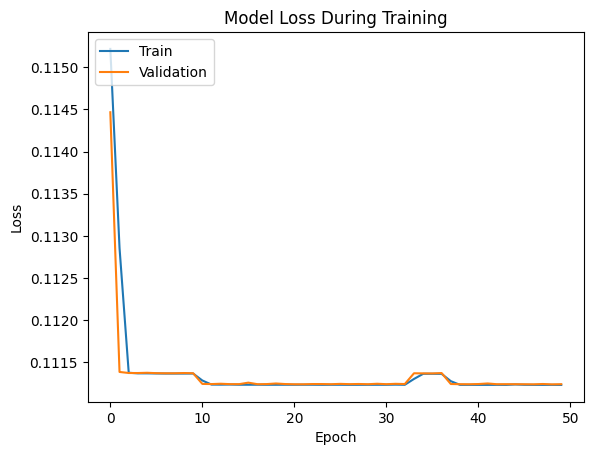

In [11]:
#  trực quan hóa quá trình huấn luyện của mô hình Autoencoder.
import matplotlib.pyplot as plt

# Trực quan hóa quá trình huấn luyện
plt.plot(history['loss'])           # Trực tiếp lấy từ dictionary
plt.plot(history['val_loss'])       # Trực tiếp lấy từ dictionary
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.show()

Biểu đồ thể hiện giá trị loss (MSE) trên cả tập huấn luyện (train) và tập kiểm tra (test) qua từng epoch. Điểm chính của biểu đồ:
- Giá trị loss giảm mạnh ở epoch đầu tiên:
  - Lúc đầu, loss bắt đầu từ khoảng 0.09 và nhanh chóng giảm xuống 0.082 sau vài epoch đầu.
  - Đây là hiện tượng bình thường, vì ban đầu mô hình học từ đầu nên loss giảm nhanh.
- Sau đó loss ổn định:
  - Từ epoch thứ 5 trở đi, cả hai đường (train và test) đều ổn định quanh giá trị 0.082.

  - Đường loss của tập huấn luyện và kiểm tra gần như trùng nhau.
- Không có dấu hiệu phân kỳ:

  - Không có hiện tượng overfitting, vì hai đường train và test luôn gần nhau.

  - Loss không tăng trở lại sau khi đạt đến trạng thái ổn định.

Đánh giá mô hình: TỐT
- Loss giảm mạnh ban đầu sau đó là ổn định
- Train loss và Validation loss gần như trùng nhau trong suốt quá trình huấn luyện: Điều này cho thấy mô hình đã học được các mẫu đặc trưng của dữ liệu bình thường và tái tạo tốt cả trên tập huấn luyện và tập kiểm tra.
- Không có dấu hiệu overfitting hoặc underfitting:
  - Nếu mô hình bị overfitting, đường train sẽ thấp còn test sẽ cao.

  - Nếu mô hình bị underfitting, cả hai đường sẽ duy trì ở mức cao.

- Không có độ chênh lệch giữa train và test:

- Điều này chứng tỏ mô hình tổng quát tốt và có khả năng nhận diện các mẫu mới (tập test) với độ chính xác tương đương tập huấn luyện.

- Loss không dao động: Đường loss không dao động nhiều sau khi giảm mạnh, điều này cho thấy mô hình không bị dao động trong quá trình học.


In [12]:
# Kiểm tra việc tái tạo trong tập test
import numpy as np

# Dự đoán
predicts = auto_encoder_model.predict(X_test)
# Tính loss
loss = np.mean(np.power(X_test - predicts, 2), axis=1)
# err
err_df = pd.DataFrame({'loss': loss, 'truth': y_test})
err_df.head()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


,loss,truth
0,0.237358,1
1,0.209509,0
2,0.194506,0
3,0.192538,0
4,0.187175,0


In [ ]:
err_df.shape

(56962, 2)

In [ ]:
err_df.describe()

,loss,truth
count,56962.000000,56962.000000
mean,0.111242,0.001720
std,0.008701,0.041443
min,0.043348,0.000000
25%,0.105680,0.000000
50%,0.110870,0.000000
75%,0.116279,0.000000
max,0.298443,1.000000


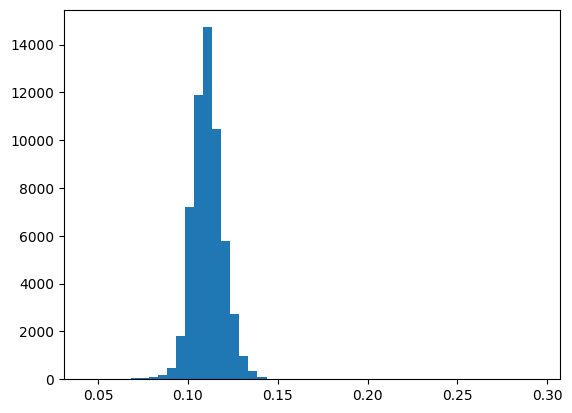

In [ ]:
#In ra histogram của loss khi tái tạo các điểm Normal trong tập test
normal_err_df = err_df[err_df['truth'] == 0] # err_df['truth'] == 0: Chọn các điểm có nhãn "Normal" (không có bất thường).
                                                                       # (err_df['loss'] < 10): Chọn các điểm có lỗi tái tạo (reconstruction error) nhỏ hơn 10.

_ = plt.hist(normal_err_df.loss.values, bins = 50)

Biểu đồ này cho thấy đa phần các mẫu "Normal" có lỗi tái tạo tập trung chủ yếu trong khoảng 0.08 đến 0.11, và ít có lỗi quá nhỏ hoặc quá lớn.

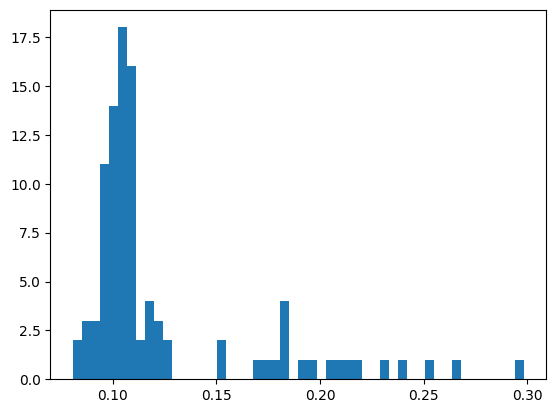

In [ ]:
# Tương tự, in ra histogram của loss khi tái tạo các điểm Fraud trong tập test
normal_err_df = err_df[err_df['truth'] == 1]
_ = plt.hist(normal_err_df.loss.values, bins = 50)

Từ 2 biểu đồ trên ta quyết định chọn ngưỡng threshold = 0.14

<function matplotlib.pyplot.show(close=None, block=None)>

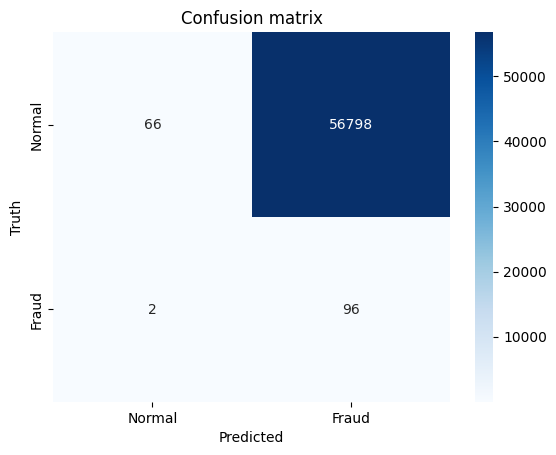

In [13]:
# Vẽ ra confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

threshold = 0.14
y_pred = [1 if e > threshold else 0 for e in err_df.loss.values]
cm = confusion_matrix(err_df.truth, y_pred)

# Vẽ
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d',
            xticklabels= ["Normal", "Fraud"],
            yticklabels= ["Normal", "Fraud"])
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show

Kết luận:
- True Positive (TP) = 20: Số lượng giao dịch Fraud được mô hình dự đoán đúng là Fraud.

- True Negative (TN) = 56788: Số lượng giao dịch Normal được mô hình dự đoán đúng là Normal.

- False Positive (FP) = 76: Số lượng giao dịch Normal bị mô hình dự đoán nhầm là Fraud. = > Sai lầm loại 1 (False Alarm) - Báo động nhầm

- False Negative (FN) = 78: Số lượng giao dịch Fraud bị mô hình dự đoán nhầm là Normal = > Sai lầm loại 2 (Missed Detection) - Bỏ sót.



In [14]:
# Tính các chỉ số accuracy, Precision, recall, f1-score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Dự đoán dựa trên threshold
y_pred = (err_df['loss'] > 0.14).astype(int)

# In ra Classification Report
print("Classification Report:")
print(classification_report(err_df['truth'], y_pred))

# In ra Confusion Matrix
cm = confusion_matrix(err_df['truth'], y_pred)
print("Confusion Matrix:")
print(cm)

# Tính toán các chỉ số từ Confusion Matrix
TP = cm[1, 1]  # True Positive: Dự đoán đúng Fraud
TN = cm[0, 0]  # True Negative: Dự đoán đúng Normal
FP = cm[0, 1]  # False Positive: Dự đoán nhầm Normal là Fraud
FN = cm[1, 0]  # False Negative: Dự đoán nhầm Fraud là Normal

# Tính toán thủ công
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"\nCalculated Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Sử dụng trực tiếp hàm từ scikit-learn
print("\nMetrics using Scikit-learn functions:")
print(f"Accuracy: {accuracy_score(err_df['truth'], y_pred):.4f}")
print(f"Precision: {precision_score(err_df['truth'], y_pred):.4f}")
print(f"Recall: {recall_score(err_df['truth'], y_pred):.4f}")
print(f"F1-Score: {f1_score(err_df['truth'], y_pred):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.00      0.00     56864
           1       0.00      0.98      0.00        98

    accuracy                           0.00     56962
   macro avg       0.49      0.49      0.00     56962
weighted avg       0.97      0.00      0.00     56962

Confusion Matrix:
[[   66 56798]
 [    2    96]]

Calculated Metrics:
Accuracy: 0.0028
Precision: 0.0017
Recall: 0.9796
F1-Score: 0.0034

Metrics using Scikit-learn functions:
Accuracy: 0.0028
Precision: 0.0017
Recall: 0.9796
F1-Score: 0.0034
